<a href="https://colab.research.google.com/github/Edu963/python_projects/blob/main/EnsembleLearning_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments**

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  :

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [ ]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [ ]:
# code here
df = pd.read_csv ('/bank-full.csv', sep = ";")

Describe the dataset informations

In [ ]:
# Display basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

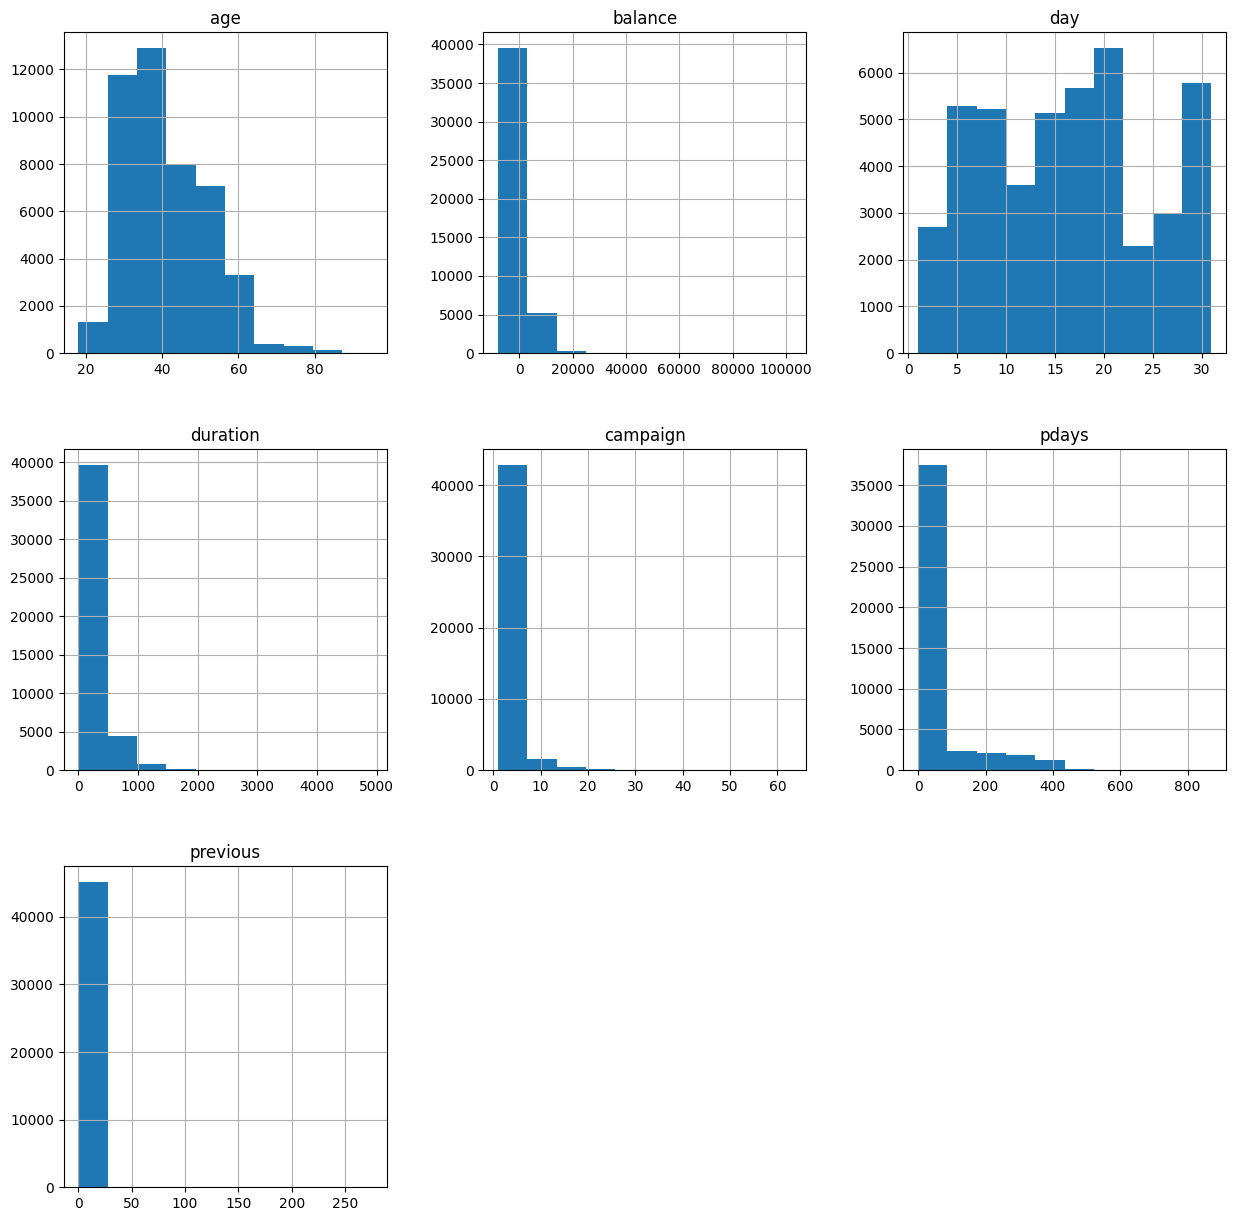

In [ ]:
rcParams['figure.figsize'] = 15, 15
df.hist()

In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Use heatmap to display the numerical features' correlation

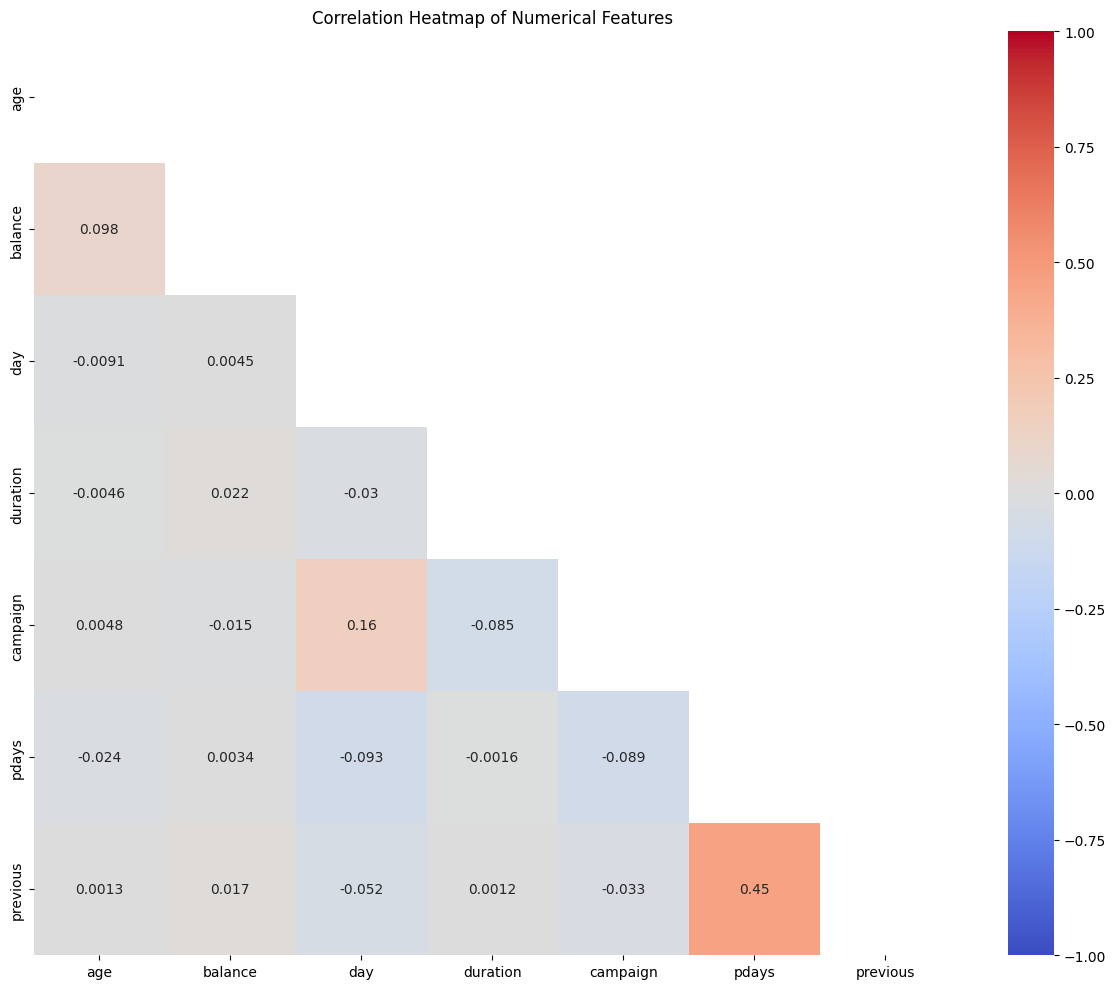

In [ ]:
# Select only the numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

Now sort the features into categorical and numerical features

In [98]:
dayoftheyear = df['day'].astype(str) + '-' + df['month']+ '-' + '1984'

KeyError: 'day'

In [99]:
dayoftheyear.head()
df['dayoftheyear'] = dayoftheyear
df.drop(['duration'], axis=1, inplace=True)
df.drop(['day', 'month'], axis=1, inplace=True)

KeyError: "['duration'] not found in axis"

In [100]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,5-may-1984
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no,5-may-1984
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,5-may-1984


In [ ]:
# Identify categorical and numerical features
categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal_features = ['education']
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pday', 'previous']


After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase.

The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [ ]:
# One-Hot Encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to the ordinal column
label_encoder = LabelEncoder()
df_encoded[ordinal_features[0]] = label_encoder.fit_transform(df[ordinal_features[0]])

# Display the first few rows of the encoded dataframe
df_encoded.head()

,age,education,balance,campaign,pdays,previous,y,dayoftheyear,job_blue-collar,job_entrepreneur,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,1,-1,0,no,5-may-1984,False,False,...,True,False,False,True,False,False,True,False,False,True
1,44,1,29,1,-1,0,no,5-may-1984,False,False,...,False,True,False,True,False,False,True,False,False,True
2,33,1,2,1,-1,0,no,5-may-1984,False,True,...,True,False,False,True,True,False,True,False,False,True
3,47,3,1506,1,-1,0,no,5-may-1984,True,False,...,True,False,False,True,False,False,True,False,False,True
4,33,3,1,1,-1,0,no,5-may-1984,False,False,...,False,True,False,False,False,False,True,False,False,True


Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

In [ ]:
# Separate the target column from the features
target_column = 'y'

# Create the X and y DataFrames
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]



At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [101]:
# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first few rows of X and y to confirm
print("First few rows of X:")
print(X.head())
print("First few rows of y:")
print(y.head())

Shape of X: (45211, 27)
Shape of y: (45211,)
First few rows of X:
   age  education  balance  campaign  pdays  previous  job_blue-collar  \
0   58          2     2143         1     -1         0            False   
1   44          1       29         1     -1         0            False   
2   33          1        2         1     -1         0            False   
3   47          3     1506         1     -1         0             True   
4   33          3        1         1     -1         0            False   

   job_entrepreneur  job_housemaid  job_management  ...  marital_married  \
0             False          False            True  ...             True   
1             False          False           False  ...            False   
2              True          False           False  ...             True   
3             False          False           False  ...             True   
4             False          False           False  ...            False   

   marital_single  default_yes  

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss.
2. A model, that performs well.

In order to highlight decision trees advantages and drawbacks, remove the `duration` column from the `X` dataset.

In [102]:

print("Shape of X after removing 'duration':", X.shape)

Shape of X after removing 'duration': (45211, 27)


Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [103]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36168, 27)
Shape of X_test: (9043, 27)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [104]:
# Remove the 'dayoftheyear' column from X
X = X.drop(columns=['dayoftheyear'])

# Display the shape of X to confirm the column has been removed
print("Shape of X after removing 'dayoftheyear':", X.shape)

KeyError: "['dayoftheyear'] not found in axis"

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# First split with seed 42
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model with max_depth=3
dt_model1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model1.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_dt1 = dt_model1.predict(X_test1)

# Evaluate the Decision Tree model
print("Decision Tree Model (Seed 42)")
print("Accuracy:", accuracy_score(y_test1, y_pred_dt1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred_dt1))
print("Classification Report:\n", classification_report(y_test1, y_pred_dt1))


Decision Tree Model (Seed 42)
Accuracy: 0.8907442220502045
Confusion Matrix:
 [[7858   94]
 [ 894  197]]
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.68      0.18      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above.

In [106]:
# Second split with a different seed, e.g., 24
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=24)

# Train a Decision Tree model with max_depth=3
dt_model2 = DecisionTreeClassifier(max_depth=3, random_state=24)
dt_model2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred_dt2 = dt_model2.predict(X_test2)

# Evaluate the Decision Tree model
print("Decision Tree Model (Seed 24)")
print("Accuracy:", accuracy_score(y_test2, y_pred_dt2))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred_dt2))
print("Classification Report:\n", classification_report(y_test2, y_pred_dt2))


Decision Tree Model (Seed 24)
Accuracy: 0.8950569501271702
Confusion Matrix:
 [[7900   98]
 [ 851  194]]
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7998
         yes       0.66      0.19      0.29      1045

    accuracy                           0.90      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.88      0.90      0.87      9043



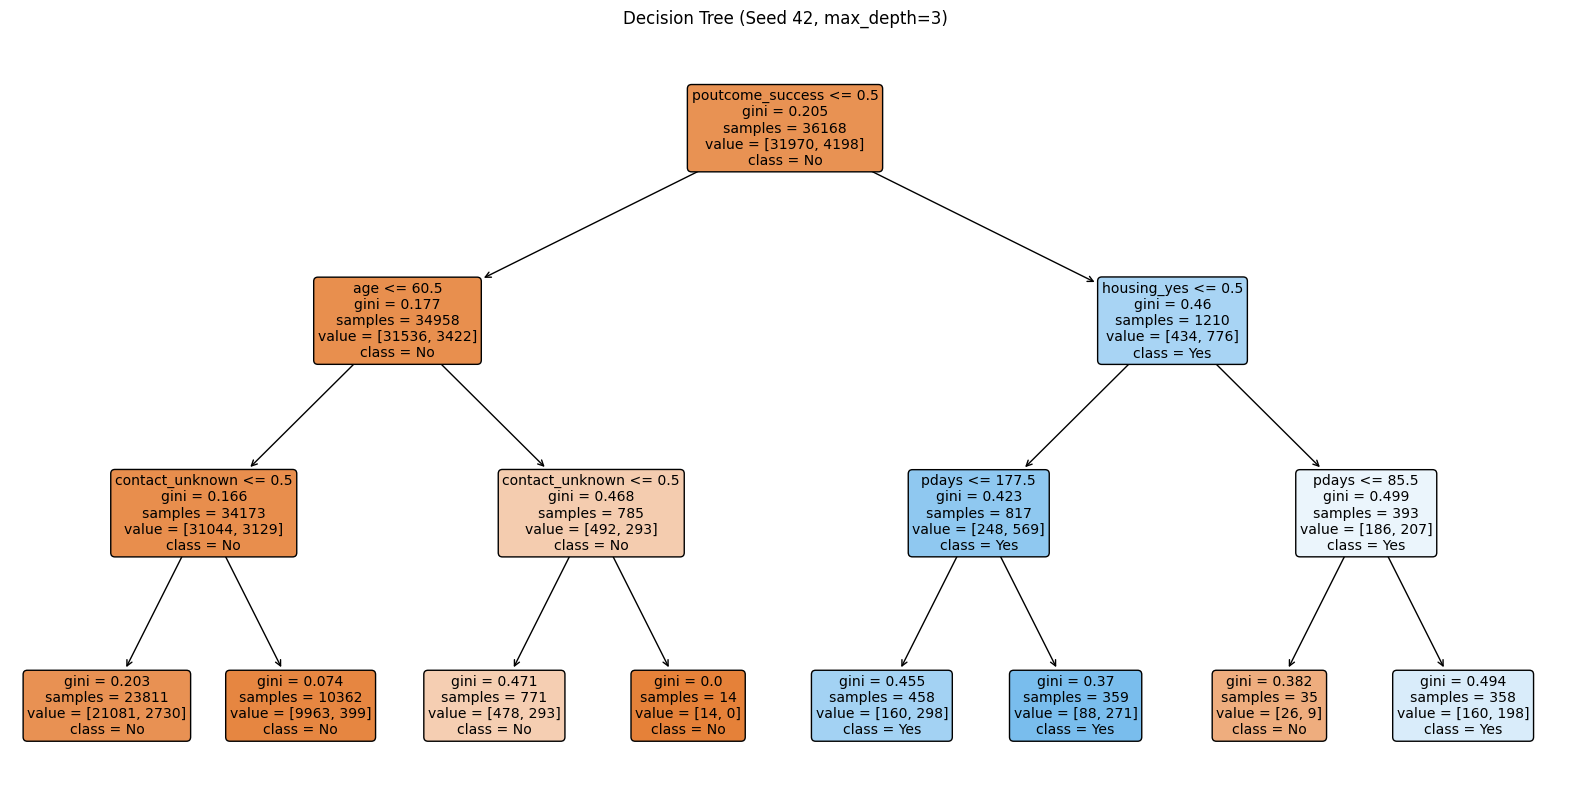

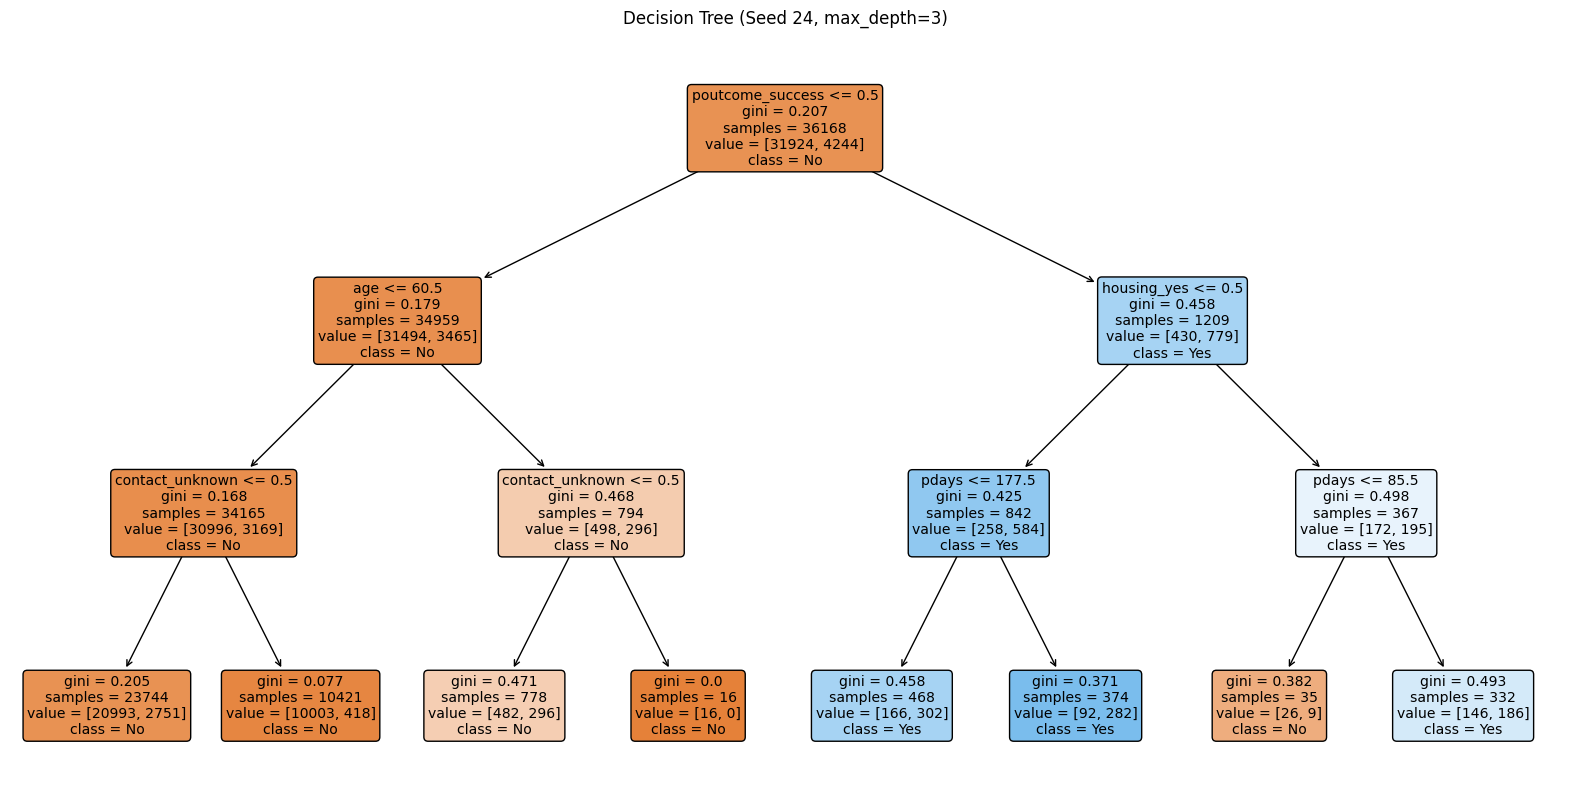

In [107]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model1, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree (Seed 42, max_depth=3)")
plt.show()

# Visualize the second decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model2, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree (Seed 24, max_depth=3)")
plt.show()


What can you tell about the two trees?

*answer here* Both models achieve a high accuracy of around 89% to 90%.  

For both models, the majority class (no) is predicted with high accuracy.
The minority class (yes) is predicted with significantly lower accuracy. Class Imbalance Issue:

The high accuracy can be misleading due to the class imbalance. The majority class (no) dominates the predictions, which inflates the overall accuracy.
The model struggles with predicting the minority class (yes), as seen in the low recall and F1-score.
Model Consistency:

Despite using different random seeds, both models produce similar results, indicating that the Decision Tree's performance is stable across different splits of the dataset.




Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)).

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [ ]:
# Cross validation on Decision trees
score_list = []

In [108]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [111]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(dt_model, X, y, cv=5, scoring=scoring, return_train_score=True)

# Convert the results to a DataFrame for better readability
cv_results_df = pd.DataFrame(cv_results)

# Display the cross-validation results
cv_results_df


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sk

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.084433,0.136574,0.883003,0.895460,NaN,NaN,NaN,NaN,NaN,NaN,0.500381,0.652637
1,0.083594,0.135897,0.883875,0.894965,NaN,NaN,NaN,NaN,NaN,NaN,0.555170,0.706537
2,0.092555,0.136614,0.888078,0.893002,NaN,NaN,NaN,NaN,NaN,NaN,0.484228,0.740350
3,0.090768,0.136490,0.911856,0.888496,NaN,NaN,NaN,NaN,NaN,NaN,0.687557,0.707192
4,0.079543,0.133938,0.841517,0.898947,NaN,NaN,NaN,NaN,NaN,NaN,0.706517,0.687706


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

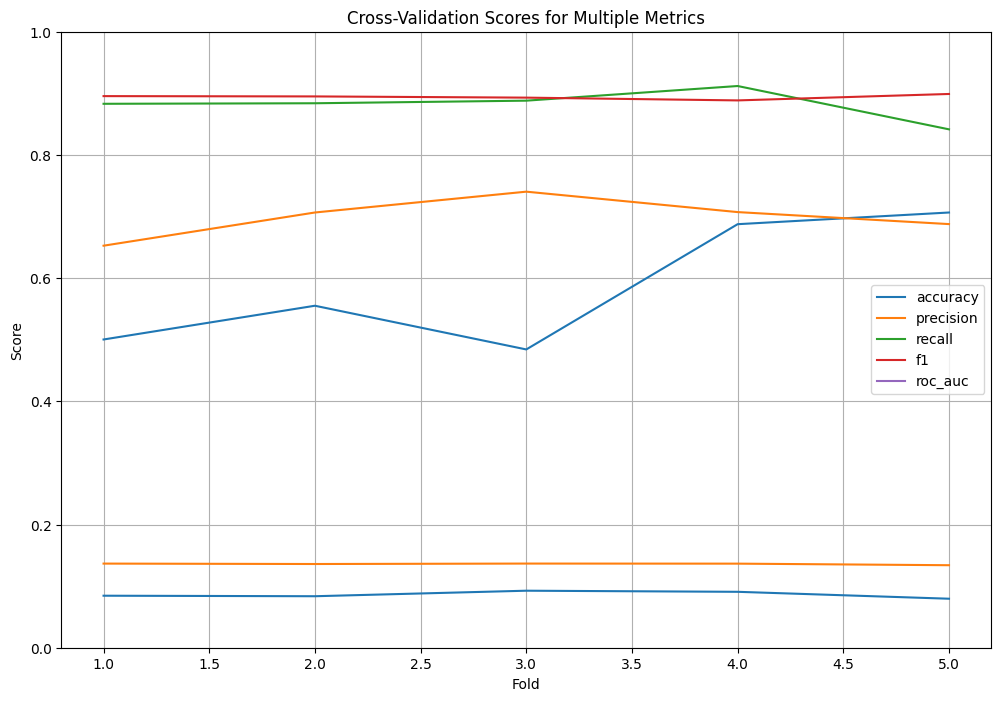

In [113]:
scores = cv_results_df
# performance plot
plt.figure(figsize=(12, 8))

for score in scores:
    plt.plot(range(1, len(scores[score]) + 1), scores[score])

plt.title('Cross-Validation Scores for Multiple Metrics')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(scoring)
plt.grid(True)
plt.show()

      fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
mean  0.172198    0.328811       0.881666        0.894174             NaN   
std   0.080053    0.133908       0.025353        0.003830             NaN   

      train_precision  test_recall  train_recall  test_f1  train_f1  \
mean              NaN          NaN           NaN      NaN       NaN   
std               NaN          NaN           NaN      NaN       NaN   

      test_roc_auc  train_roc_auc  
mean      0.586771       0.698884  
std       0.104252       0.032057  


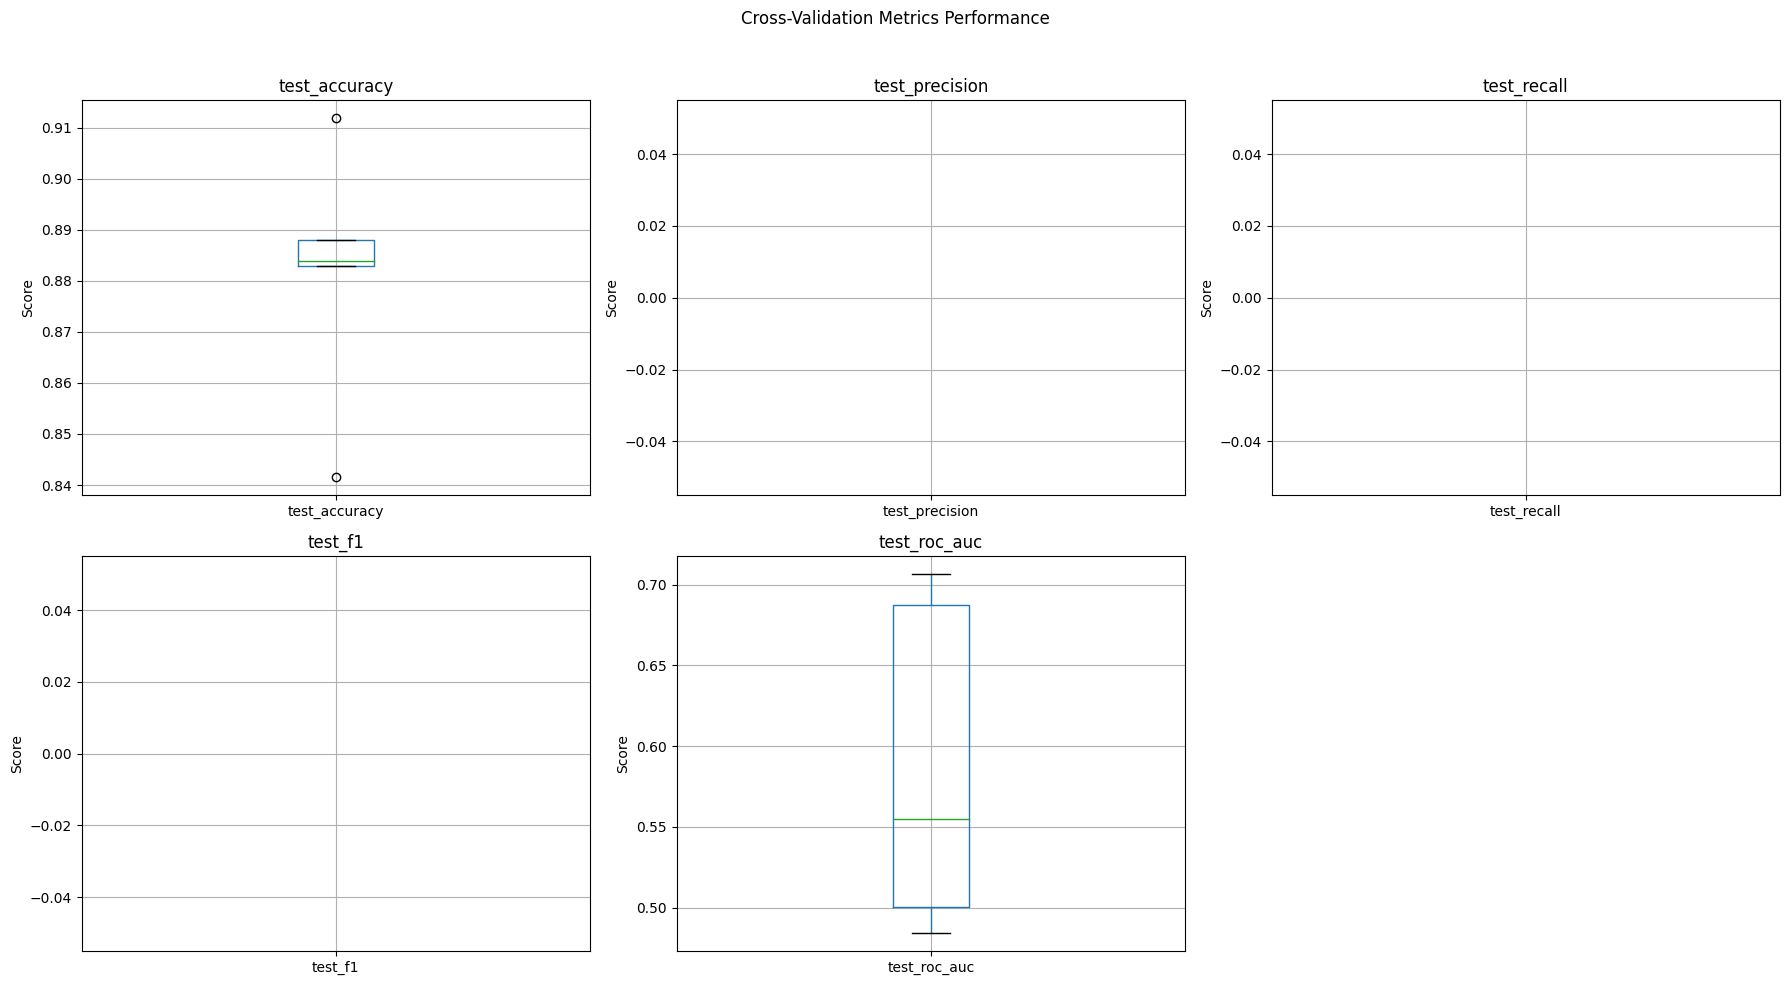

In [ ]:


# Calculate the mean and standard deviation of each metric
metrics_summary = cv_results_df.describe().loc[['mean', 'std']]

# Display the summary
print(metrics_summary)

# Plotting the performance of each metric
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Cross-Validation Metrics Performance')

for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    cv_results_df.boxplot(column=metric, ax=ax)
    ax.set_title(f'{metric}')
    ax.set_ylabel('Score')

# Remove the last empty subplot
fig.delaxes(axes[1,2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid for max_depth
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]}

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the scorer
scorer = make_scorer(f1_score, pos_label='yes')

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Get the results of the grid search
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the results
cv_results.head()


Best Parameters: {'max_depth': 1}
Best F1-Score: 0.24423365205852807


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.345394,0.049040,0.434506,0.039257,1,{'max_depth': 1},0.0,0.042593,0.235585,0.475432,0.467559,0.244234,0.201847,1
1,0.360014,0.178253,0.302897,0.196110,2,{'max_depth': 2},0.0,0.042593,0.149956,0.457375,0.428742,0.215733,0.192150,2
2,0.147580,0.004200,0.150497,0.006584,3,{'max_depth': 3},0.0,0.013158,0.088288,0.467602,0.428856,0.199581,0.205609,3
3,0.166855,0.004657,0.141179,0.001179,4,{'max_depth': 4},0.0,0.046211,0.153448,0.341246,0.347926,0.177766,0.145037,6
4,0.187240,0.007654,0.149460,0.010456,5,{'max_depth': 5},0.0,0.042593,0.160069,0.413891,0.349377,0.193186,0.163831,4


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Retrieve the best max_depth from the grid search
best_max_depth = grid_search.best_params_['max_depth']

print("Best max_depth from grid search:", best_max_depth)

Best max_depth from grid search: 1


In [ ]:
# Define the Decision Tree model with the best max_depth
best_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model on the whole training set
best_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')
roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Test Set Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Test Set Evaluation Metrics:
Accuracy: 0.8907442220502045
Precision: 0.6710963455149501
Recall: 0.1851512373968836
F1-Score: 0.29022988505747127
ROC AUC: 0.5863507696038743

Confusion Matrix:
 [[7853   99]
 [ 889  202]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach!

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [84]:
# Split the data into training and testing sets using seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (36168, 27)
Shape of X_test: (9043, 27)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


In [85]:
# Define the base estimator (Decision Tree) with the best max_depth obtained from the grid search
base_estimator = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Define the Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42, n_jobs=-1)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=42),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [86]:
# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, pos_label='yes')
recall_bagging = recall_score(y_test, y_pred_bagging, pos_label='yes')
f1_bagging = f1_score(y_test, y_pred_bagging, pos_label='yes')
roc_auc_bagging = roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

# Print the evaluation metrics
print("Bagging Model Evaluation Metrics:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1-Score:", f1_bagging)
print("ROC AUC:", roc_auc_bagging)
print("\nConfusion Matrix:\n", conf_matrix_bagging)
print("\nClassification Report:\n", class_report_bagging)


Bagging Model Evaluation Metrics:
Accuracy: 0.8907442220502045
Precision: 0.6710963455149501
Recall: 0.1851512373968836
F1-Score: 0.29022988505747127
ROC AUC: 0.5863507696038743

Confusion Matrix:
 [[7853   99]
 [ 889  202]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the scorer (using F1-score for this example)
scorer = make_scorer(f1_score, pos_label='yes')

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1-Score:", grid_search_rf.best_score_)

# Get the results of the grid search
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Display the first few rows of the results
cv_results_rf.head()


Best Parameters: {'max_depth': 30, 'n_estimators': 100}
Best F1-Score: 0.2943176552767626


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.464327,0.326916,0.484182,0.170044,None,50,"{'max_depth': None, 'n_estimators': 50}",0.285467,0.302183,0.304746,0.290155,0.278215,0.292153,0.010021,4
1,7.478847,1.534196,0.483111,0.162060,None,100,"{'max_depth': None, 'n_estimators': 100}",0.291194,0.302285,0.299160,0.278746,0.286463,0.291569,0.008522,5
2,14.222712,2.697648,0.884410,0.365148,None,200,"{'max_depth': None, 'n_estimators': 200}",0.291379,0.307962,0.305743,0.282969,0.279438,0.293498,0.011595,2
3,2.620608,0.885618,0.328951,0.206518,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.271347,0.281553,0.288910,0.253140,0.244742,0.267938,0.016696,10
4,3.291746,0.567783,0.288493,0.102614,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.272381,0.278210,0.290774,0.244898,0.244466,0.266146,0.018506,11


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

The highest mean F1-score (0.294) was obtained with max_depth=30 and n_estimators=100.
The F1-scores for different combinations of parameters are fairly close, suggesting diminishing returns with higher values of n_estimators.


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model with the best parameters
optimal_rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Retrain the model on the whole training set
optimal_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimal_rf = optimal_rf_model.predict(X_test)

# Evaluate the model
accuracy_optimal_rf = accuracy_score(y_test, y_pred_optimal_rf)
precision_optimal_rf = precision_score(y_test, y_pred_optimal_rf, pos_label='yes')
recall_optimal_rf = recall_score(y_test, y_pred_optimal_rf, pos_label='yes')
f1_optimal_rf = f1_score(y_test, y_pred_optimal_rf, pos_label='yes')
roc_auc_optimal_rf = roc_auc_score(y_test, optimal_rf_model.predict_proba(X_test)[:, 1])
conf_matrix_optimal_rf = confusion_matrix(y_test, y_pred_optimal_rf)
class_report_optimal_rf = classification_report(y_test, y_pred_optimal_rf)

# Print the evaluation metrics
print("Optimal Random Forest Model Evaluation Metrics:")
print("Accuracy:", accuracy_optimal_rf)
print("Precision:", precision_optimal_rf)
print("Recall:", recall_optimal_rf)
print("F1-Score:", f1_optimal_rf)
print("ROC AUC:", roc_auc_optimal_rf)
print("\nConfusion Matrix:\n", conf_matrix_optimal_rf)
print("\nClassification Report:\n", class_report_optimal_rf)


Optimal Random Forest Model Evaluation Metrics:
Accuracy: 0.8857679973460135
Precision: 0.5763157894736842
Recall: 0.20073327222731438
F1-Score: 0.29775662814411963
ROC AUC: 0.7159650732073467

Confusion Matrix:
 [[7791  161]
 [ 872  219]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.58      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

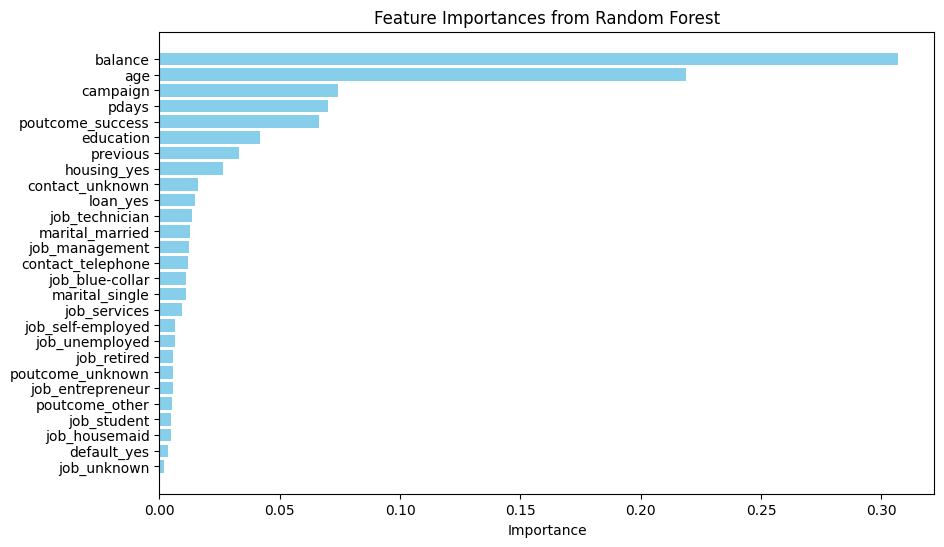

The most important feature is: balance


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model with the best parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Display the most important feature
most_important_feature = features.iloc[0]
print("The most important feature is:", most_important_feature['Feature'])


What is the most important feature?

*Answer here*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at :

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [91]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd

# Split the data into training and testing sets using seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# Define the Random Forest model with the best parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Define the RFE model
rfe = RFE(estimator=rf_model, n_features_to_select=10)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'education', 'balance', 'campaign', 'pdays', 'previous',
       'job_technician', 'housing_yes', 'contact_unknown', 'poutcome_success'],
      dtype='object')


In [93]:
# Train the model with the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Retrain the Random Forest model on the selected features
rf_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred_rfe = rf_model.predict(X_test_rfe)

# Evaluate the model
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
precision_rfe = precision_score(y_test, y_pred_rfe, pos_label='yes')
recall_rfe = recall_score(y_test, y_pred_rfe, pos_label='yes')
f1_rfe = f1_score(y_test, y_pred_rfe, pos_label='yes')
roc_auc_rfe = roc_auc_score(y_test, rf_model.predict_proba(X_test_rfe)[:, 1])
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
class_report_rfe = classification_report(y_test, y_pred_rfe)

# Print the evaluation metrics
print("Random Forest Model with RFE Evaluation Metrics:")
print("Accuracy:", accuracy_rfe)
print("Precision:", precision_rfe)
print("Recall:", recall_rfe)
print("F1-Score:", f1_rfe)
print("ROC AUC:", roc_auc_rfe)
print("\nConfusion Matrix:\n", conf_matrix_rfe)
print("\nClassification Report:\n", class_report_rfe)


Random Forest Model with RFE Evaluation Metrics:
Accuracy: 0.8772531239632865
Precision: 0.47983014861995754
Recall: 0.2071494042163153
F1-Score: 0.2893725992317542
ROC AUC: 0.6870279306452831

Confusion Matrix:
 [[7707  245]
 [ 865  226]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.97      0.93      7952
         yes       0.48      0.21      0.29      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.59      0.61      9043
weighted avg       0.85      0.88      0.86      9043



In [ ]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features

In [114]:
# Define the Random Forest model with the best parameters from the previous step
rf_model = RandomForestClassifier(random_state=42)

# Define the RFE model and fit it
rfe = RFE(estimator=rf_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Transform the training and testing sets to include only the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Define the scorer (using F1-score for this example)
scorer = make_scorer(f1_score, pos_label='yes')

In [116]:
# Perform Grid Search with cross-validation
grid_search_rf_rfe = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search_rf_rfe.fit(X_train_rfe, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_rf_rfe.best_params_)
print("Best F1-Score:", grid_search_rf_rfe.best_score_)

# Get the results of the grid search
cv_results_rf_rfe = pd.DataFrame(grid_search_rf_rfe.cv_results_)

# Display the first few rows of the results
cv_results_rf_rfe.head()


Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best F1-Score: 0.3014211791544688


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.658302,1.047439,0.349425,0.086436,None,50,"{'max_depth': None, 'n_estimators': 50}",0.291667,0.284757,0.316206,0.276370,0.277049,0.289210,0.014611,9
1,6.146900,0.953084,0.427896,0.144249,None,100,"{'max_depth': None, 'n_estimators': 100}",0.296474,0.294020,0.323553,0.285714,0.292007,0.298354,0.013095,6
2,11.471086,0.987165,0.735005,0.178595,None,200,"{'max_depth': None, 'n_estimators': 200}",0.300161,0.308590,0.323459,0.283839,0.291057,0.301421,0.013822,1
3,1.952770,0.476636,0.217488,0.074729,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.279889,0.283510,0.299169,0.265907,0.248106,0.275316,0.017239,12
4,3.824649,0.759084,0.322856,0.112648,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.286242,0.279070,0.299908,0.264762,0.258491,0.277694,0.014862,10


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [117]:
# use the same split and seed than you used before

In [124]:
# Convert the target variable to numerical values
y_train_num = y_train.apply(lambda x: 1 if x == 'yes' else 0)
y_test_num = y_test.apply(lambda x: 1 if x == 'yes' else 0)

# Check the conversion
print(y_train_num.value_counts())
print(y_test_num.value_counts())

y
0    31970
1     4198
Name: count, dtype: int64
y
0    7952
1    1091
Name: count, dtype: int64


*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [118]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [126]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_rfe, y_train_num)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_rfe)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_num, y_pred_xgb)
precision_xgb = precision_score(y_test_num, y_pred_xgb)
recall_xgb = recall_score(y_test_num, y_pred_xgb)
f1_xgb = f1_score(y_test_num, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_num, xgb_model.predict_proba(X_test_rfe)[:, 1])
conf_matrix_xgb = confusion_matrix(y_test_num, y_pred_xgb)
class_report_xgb = classification_report(y_test_num, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Model Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC AUC:", roc_auc_xgb)
print("\nConfusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", class_report_xgb)


XGBoost Model Evaluation Metrics:
Accuracy: 0.8863209112020347
Precision: 0.5987460815047022
Recall: 0.17506874427131072
F1-Score: 0.27092198581560284
ROC AUC: 0.7271802215677198

Confusion Matrix:
 [[7824  128]
 [ 900  191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.18      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [120]:
# Test metrics

In [121]:
# performance curves

In [127]:
# Convert the target variable to numerical values
y_train_num = y_train.apply(lambda x: 1 if x == 'yes' else 0)
y_test_num = y_test.apply(lambda x: 1 if x == 'yes' else 0)

# Define the XGBoost model with selected hyperparameters
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=6, use_label_encoder=False, eval_metric='logloss')

# Retrain the model on the whole training set
xgb_model.fit(X_train_rfe, y_train_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [128]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_rfe)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_rfe)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_num, y_pred_xgb)
precision_xgb = precision_score(y_test_num, y_pred_xgb)
recall_xgb = recall_score(y_test_num, y_pred_xgb)
f1_xgb = f1_score(y_test_num, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_num, y_pred_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_test_num, y_pred_xgb)
class_report_xgb = classification_report(y_test_num, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Model Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC AUC:", roc_auc_xgb)
print("\nConfusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", class_report_xgb)


XGBoost Model Evaluation Metrics:
Accuracy: 0.8863209112020347
Precision: 0.5987460815047022
Recall: 0.17506874427131072
F1-Score: 0.27092198581560284
ROC AUC: 0.7271802215677198

Confusion Matrix:
 [[7824  128]
 [ 900  191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.18      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [132]:
from sklearn.metrics import roc_curve, auc

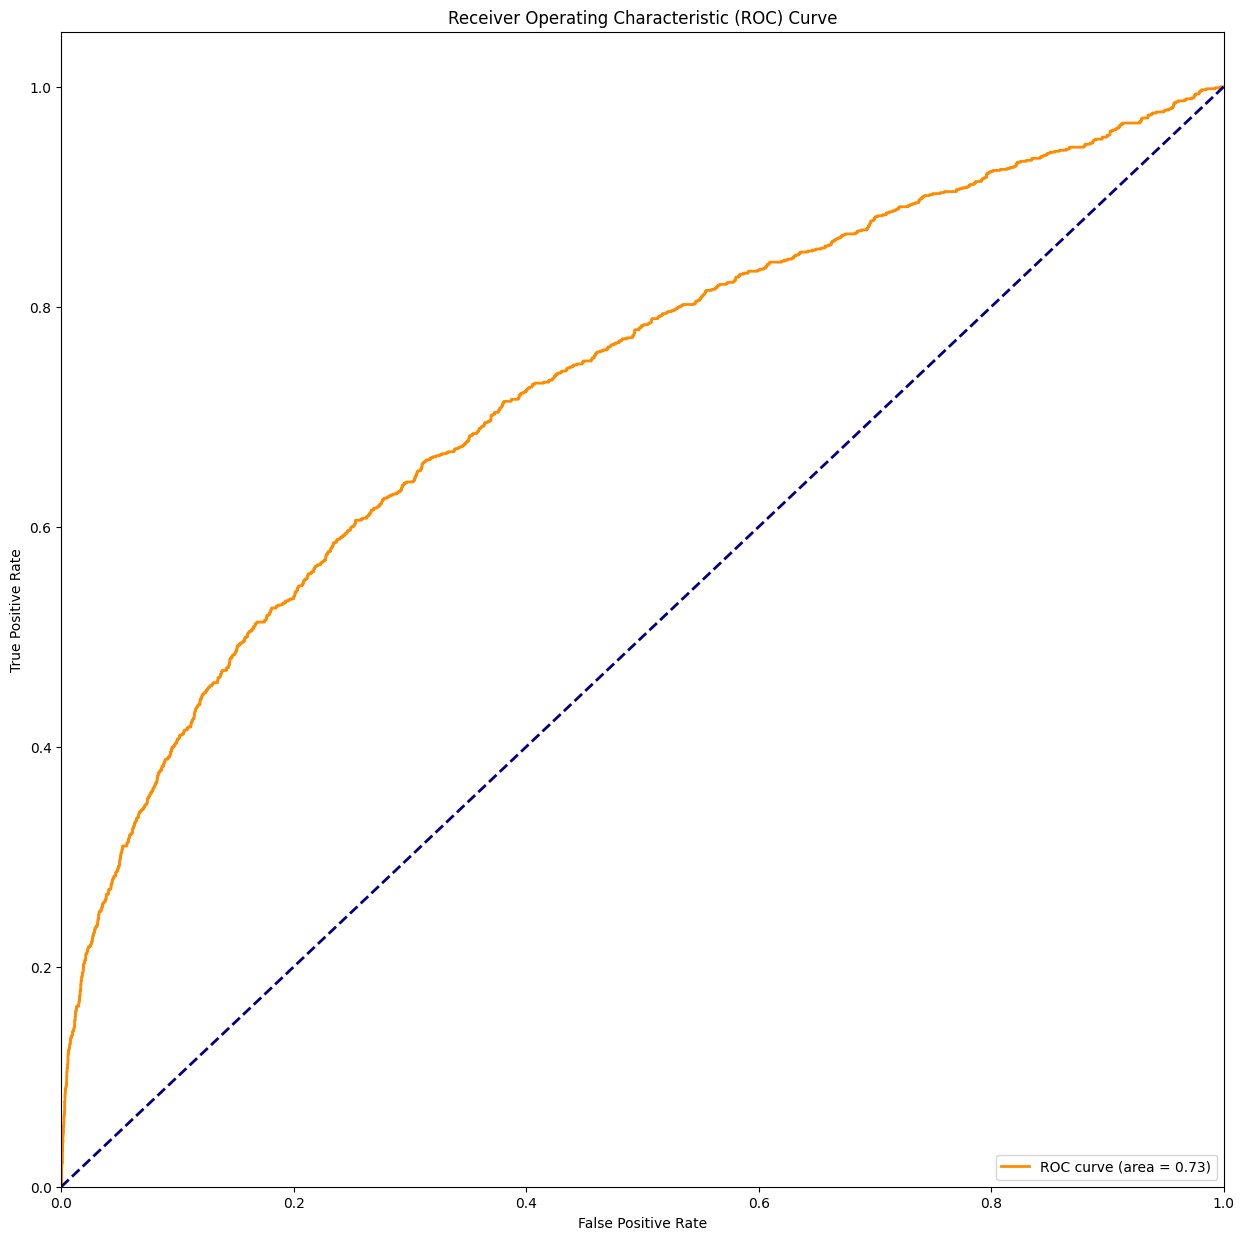

In [133]:
# Generate the ROC curve
fpr, tpr, _ = roc_curve(y_test_num, y_pred_proba_xgb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Let's Conclude

Report your test set metrics for the three methods here

In [ ]:
# Decision Tree on test set

In [ ]:
# Random forest on test set

In [ ]:
# XGBoost on test set

What do you notice?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional)

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here